In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load the dataset
data = pd.read_csv("/content/penguins_size.csv")

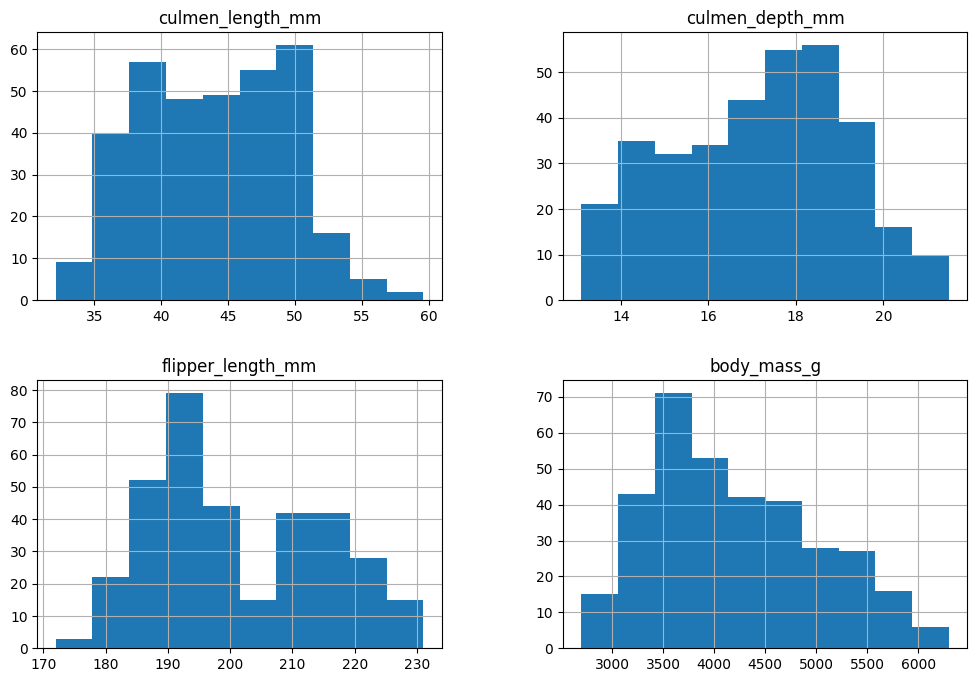

In [5]:
# 3. Univariate Analysis
# Visualize individual variables (numerical) using histograms
data.hist(figsize=(12, 8))
plt.show()

<ipython-input-51-5b0f02613933>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.body_mass_g)


<Axes: xlabel='body_mass_g', ylabel='Density'>

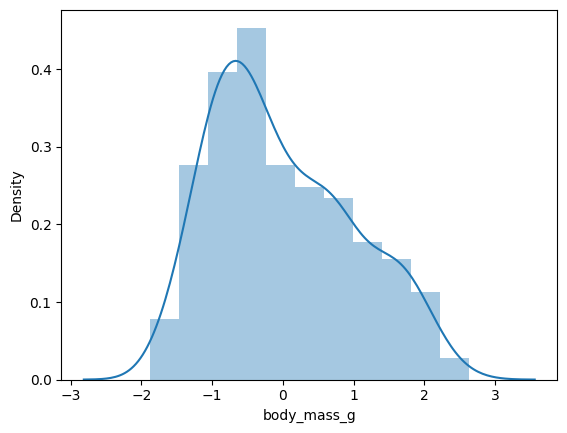

In [51]:
sns.distplot(data.body_mass_g)

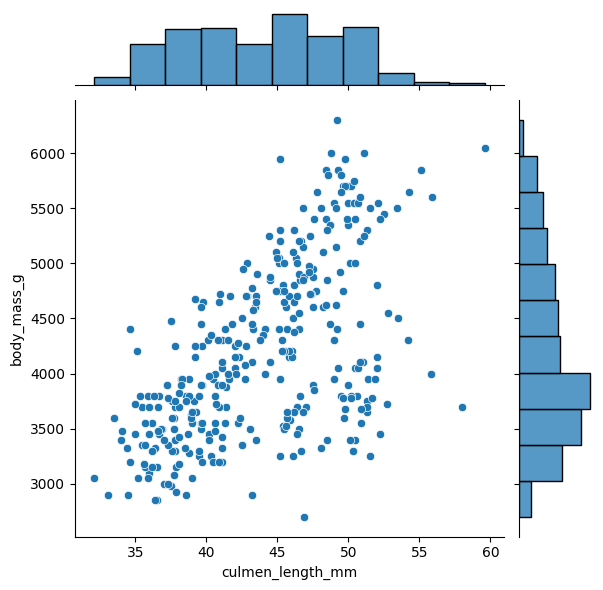

In [11]:
#4. bivariate
sns.jointplot(x='culmen_length_mm',y='body_mass_g',data=data)


<Axes: xlabel='culmen_depth_mm', ylabel='body_mass_g'>

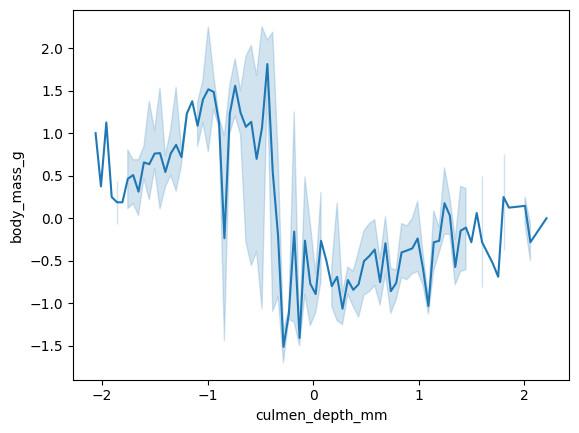

In [54]:
sns.lineplot(x='culmen_depth_mm',y='body_mass_g',data=data)


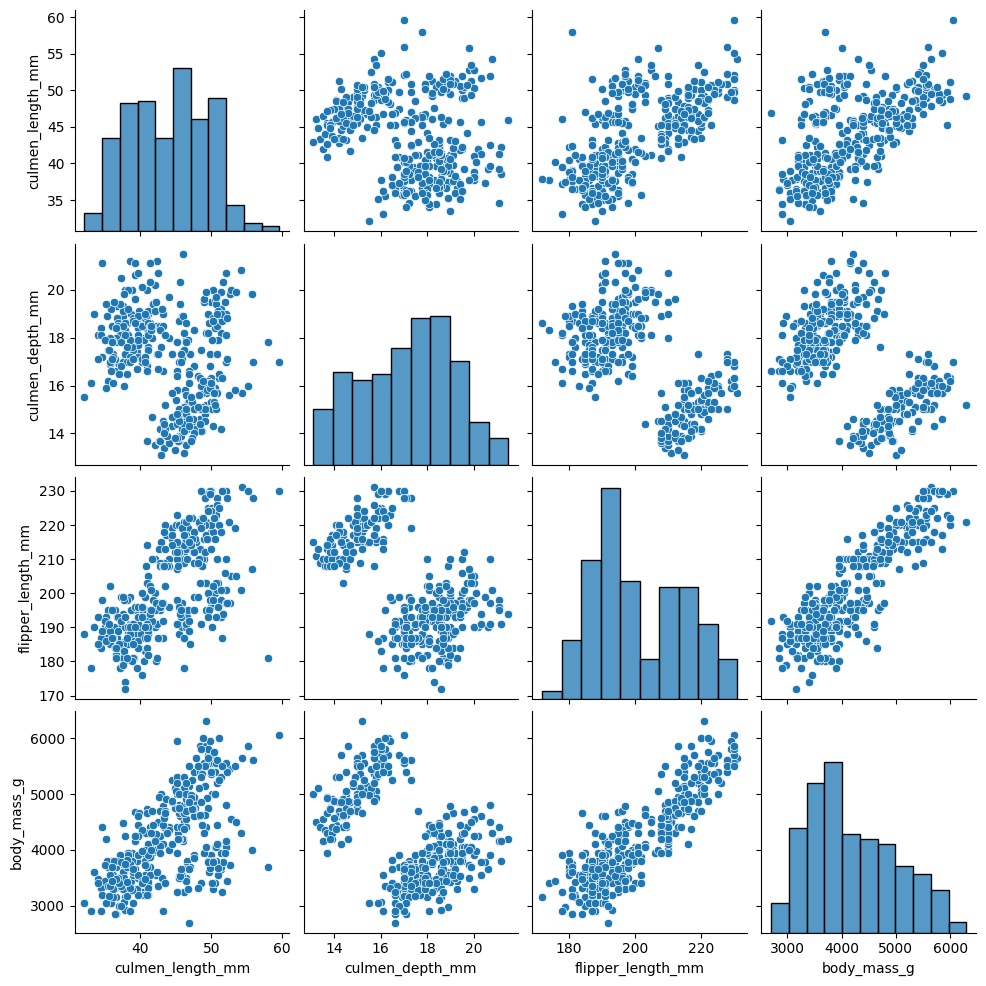

In [9]:
# 5. multivariate Analysis
# Visualize relationships between pairs of variables (scatter plots)
sns.pairplot(data)
plt.show()

<ipython-input-12-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

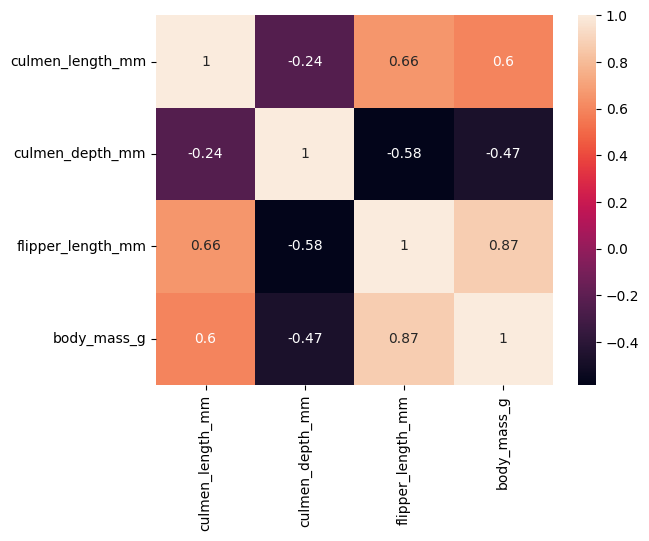

In [12]:
sns.heatmap(data.corr(),annot=True)

In [14]:
# 6. Descriptive Statistics
# Calculate and display descriptive statistics
desc_stats = data.describe()
print(desc_stats)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [15]:
# 7. Missing Value Handling
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [16]:
data.sex= data.sex.fillna(data.sex.mode().iloc[0])


In [17]:
data.fillna(data.median(), inplace=True)

<ipython-input-17-48d8393c03d4>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [18]:
missing_values = data.isnull().sum()
print(missing_values)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [20]:
# 8. Outlier Detection and Handling
# Example for Z-score-based outlier removal
from scipy import stats

# Select numeric columns for Z-score calculation
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
z_scores = np.abs(stats.zscore(data[numeric_columns]))

# Set a Z-score threshold (e.g., 3) for outlier removal
threshold = 3
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

# Now, data_no_outliers contains rows with outliers removed from the specified numeric columns.


<ipython-input-21-e2479642a234>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


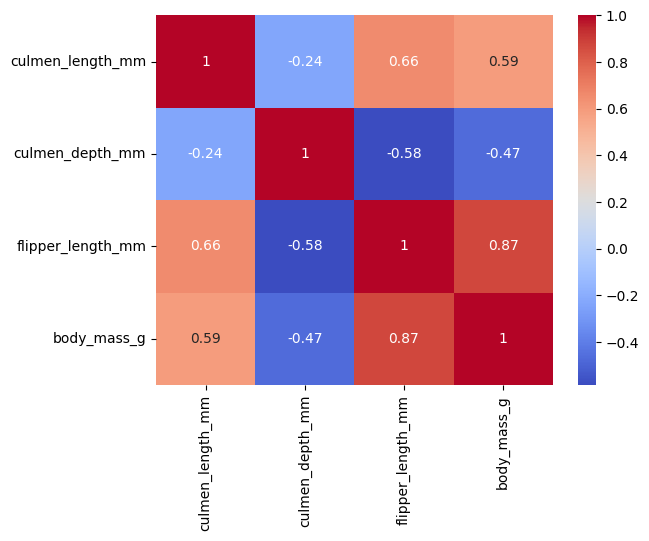

In [21]:
# 9. Correlation Analysis
# Calculate correlation matrix
correlation_matrix = data.corr()
# Visualize correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [37]:
# 10. Categorical Variable Encoding (One-Hot Encoding)

# Replace 'your_categorical_column_name' with the name of your actual categorical column
categorical_column = 'flipper_length_mm'

# Use pandas' get_dummies function for one-hot encoding
data = pd.get_dummies(data, columns=[categorical_column], prefix=[categorical_column])

# The data DataFrame now contains one-hot encoded columns for the categorical variable.


In [38]:
# 11. Split Data into Dependent and Independent Variables
X = data.drop(columns=['species'])
y = data['species']


In [40]:
# 12. Data Scaling (Scaling only numeric columns)
numeric_columns = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_scaled = X.copy()  # Create a copy of X
X_scaled[numeric_columns] = scaler.fit_transform(X_scaled[numeric_columns])


In [41]:
# 13. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [42]:
# 14. Check the Training and Testing Data Shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (275, 226)
X_test shape: (69, 226)
y_train shape: (275,)
y_test shape: (69,)


In [44]:
#something extra i was doing just for fun
# 10. Categorical Variable Encoding (One-Hot Encoding)

# Replace 'categorical_column' with the name of your actual categorical column
categorical_column = 'island'

# Use pandas' get_dummies function for one-hot encoding
data = pd.get_dummies(data, columns=[categorical_column], prefix=[categorical_column])

# The data DataFrame now contains one-hot encoded columns for the categorical variable.

# 15. Classification using Random Forest (you can choose other classifiers as well)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(columns=['species'])  # Replace 'species' with your target variable
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [47]:
# 16. Evaluate the classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8405797101449275
Confusion Matrix:
 [[28  4  0]
 [ 7  9  0]
 [ 0  0 21]]
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.80      0.88      0.84        32
   Chinstrap       0.69      0.56      0.62        16
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.84        69
   macro avg       0.83      0.81      0.82        69
weighted avg       0.84      0.84      0.84        69

